## [07] LightGBM

LightGBM은 XGBoost와 함께 부스팅 계열 알고리즘에서 각광을 받고 있음. 

LightGBM의 가장 큰 장점은 XGBoost보다 학습에 걸리는 시간이 훨씬 적다는 점임. 또한 메모리의 사용량도 상대적으로 적음. 

LightGBM과 XGBoost의 예측 성능은 별다른 차이가 없고, 기능상의 다양성은 LightGBM이 약간 더 많음. 

LightGBM의 한가지 단점으로는 적은 데이터 세트에 적용할 경우 과적합이 발생하기 쉬움. 

-----------------

LightGBM은 일반 GBM계열의 트리 분할 방법과 다르게 리프 중심 트리 분할 방식을 사용.

 - 리프 중심트리 분할방식은 트리의 균형을 맞추지 않고, 최대 손실 값을 가지는 리프노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭적인 규칙 트리가 생성.
 - 이러한 트리는 학습을 반복할수록 균형트리 분할 방식보다 예측 오류 손실을 최소화 할 수 있다는 것이 생각.
 
 ----------------------
 LightGBM의 파이썬 패키지명은 'lightgbm'
 
 XGBoost와 마찬가지로 초기에는 파이썬 래펴용 LightGBM만 개발되었다가 사이킷런과의 호환성을 지원하기 위해 사이킷런 래퍼 LightGBM이 추가로 개발.
  - 사이킷런 래퍼 LightGBM 클래스는 분류를 위한LGBMClassifier클래스와 회귀를 위한 LgBMRegressor 클래스.
  - 이제부터는 사이킷런 래퍼 클래스만 설명할 예정.

**[LightGBM 설치]**

**[LightGBM 하이퍼 파라미터]**

 : LightGBM은 Xgboost와 다르게 리프노드가 계속 분할되면서 트리의 깊이가 깊어지므로 이러한 트리 특성에 맞는 하이퍼 파라미터 설정이 필요함.
 
 <주요 파라미터>

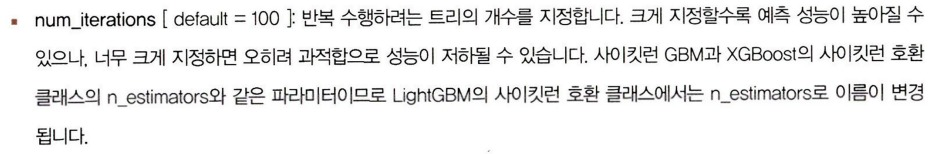

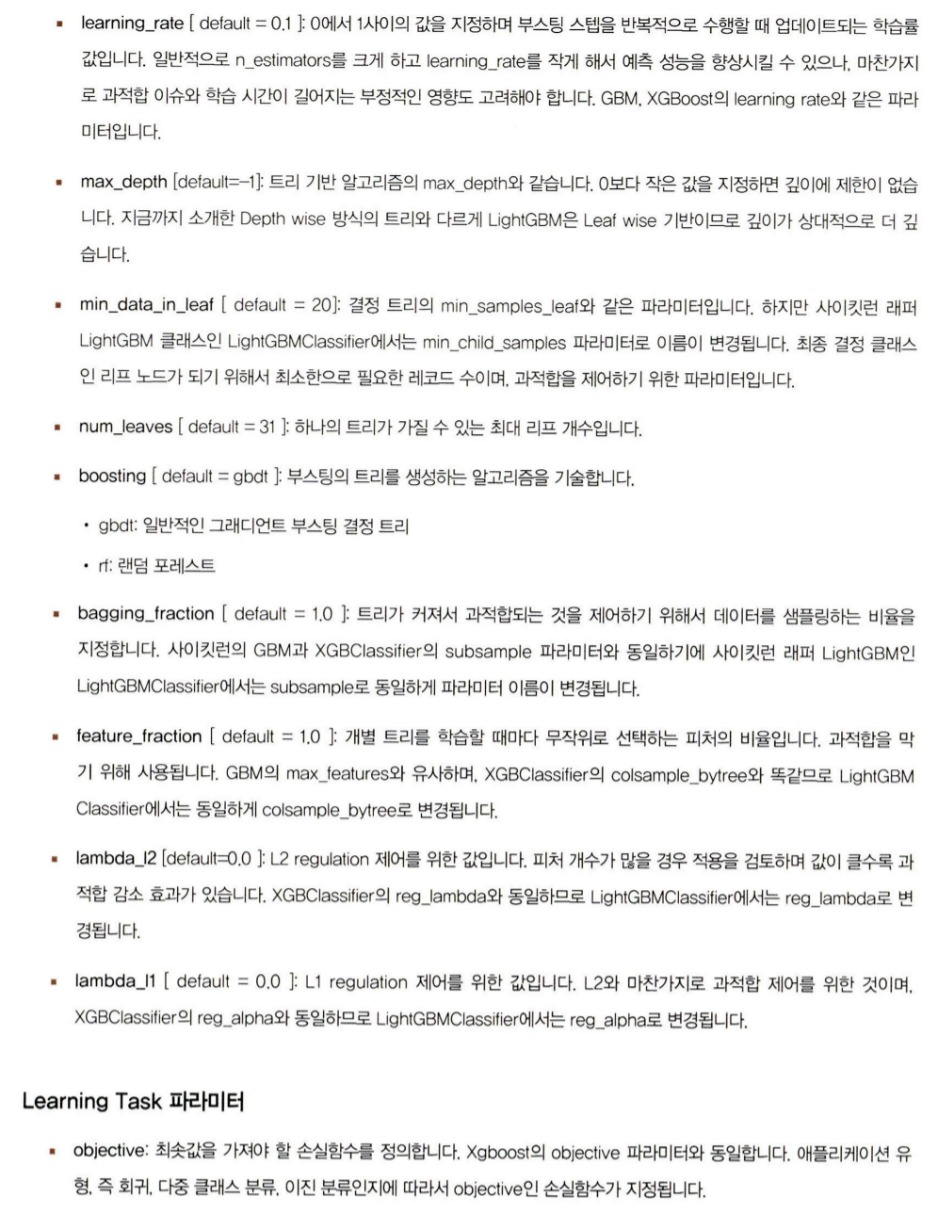

**[하이퍼 파라미터 튜닝 방안]**

 : num_leaves의 개수를 중심으로 min_child_samples, max_depth를 함께 조정하면서 모델의 복잡도를 줄이는 것이 기본 튜닝 방안.
 
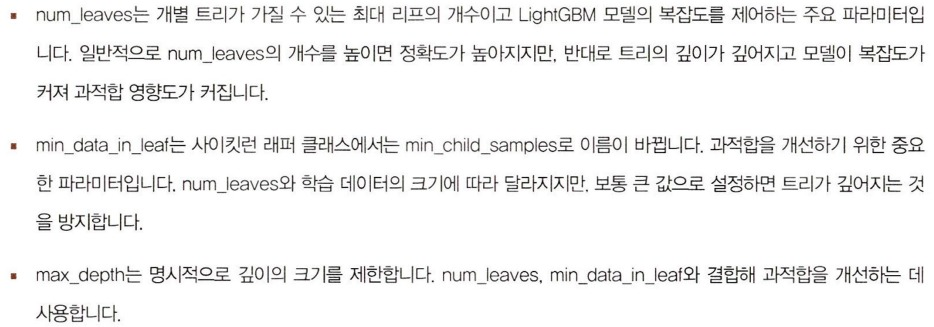

 - learning_rate를 작게 하면서 n_estimators를 크게 하는 것은 가장 기본적인 튜닝 방안.
 - 과적합을 제어하기 위해 regularization을 적용하거나, 학습 데이터에 사용할 피처의 개수나 데이터 샘플링 레코드 개수를 줄이기 위해 colsamplr_bytree, subsample파라미터 적용

**[파이썬 래퍼 LightGBM과 사이킷런 래퍼 XGBoost, LightGBM 하이퍼 파라미터 비교]**

 - XGBoost는 사이킷런 하이퍼 파라미터 명명 규칙에 따라 자신의 하이퍼 파라미터를 변경
  - LightGBM은 사이킷런 래퍼 LightGBM의 파이퍼 파라미터를 사이킷런 XGBoost에 맞춰서 변경.
  => 사이킷런 래퍼 LightGBM과 사이킷런 래퍼 XGBoost는 많은 하이퍼 파라미터가 똑같음.
  
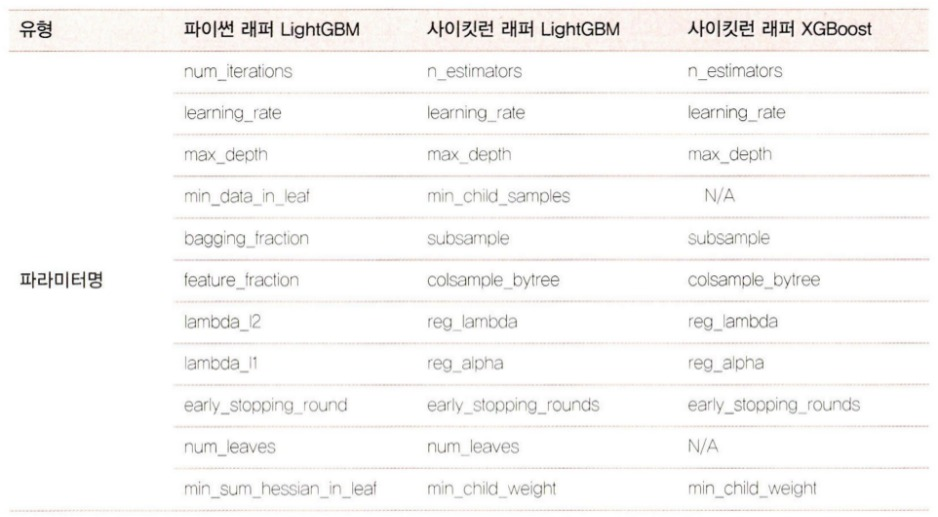

**[LightGBM 적용 - 위스콘신 유방암 예측]**

: LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier를 임포트해 사용.
 - LightGBM도 XGBoost와 동일하게 조기 중단이 가능. 조기 중단 관련 파라미터를 설정해주면 됨.

In [1]:
!pip install lightgbm==3.3.2

In [3]:
#LightGBM의 파이썬 패키지인 lightgbm 에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

#전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출.
X_train, X_test, y_train, y_test = train_test_split(ftr,target, test_size=0.2,
                                                    random_state=156)

#앞서 XGBoost와 동일하게 n_estimators는 400 설정
lgbm_wrapper = LGBMClassifier(n_estimators=400)

#LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능
evals = [(X_test,y_test)]
lgbm_wrapper.fit(X_train,y_train,early_stopping_rounds=100, eval_metric="logloss",
                eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.565079
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_logloss: 0.151113
[25]	valid_0's binary_logloss: 0.148395
[26]	vali

C:\Users\june0\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\june0\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


 - 조기중단으로 145번 반복까지만 수행하고 학습을 종료.

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
def get_clf_eval(y_test, pred=None, pred_proba=None) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # roc_auc 추가
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, \
    F1 : {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
get_clf_eval(y_test,preds,pred_proba)

오차 행렬
[[33  4]
 [ 1 76]]
정확도 : 0.9561, 정밀도 : 0.9500, 재현율 : 0.9870,     F1 : 0.9682, AUC:0.9905


 - 예측성능을 평가해 보니 정확도가 약 94.74%

 - lightgbm은 피처 중요도를 시각화할 수 있는 내장 API를 제공. plot_importance().

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

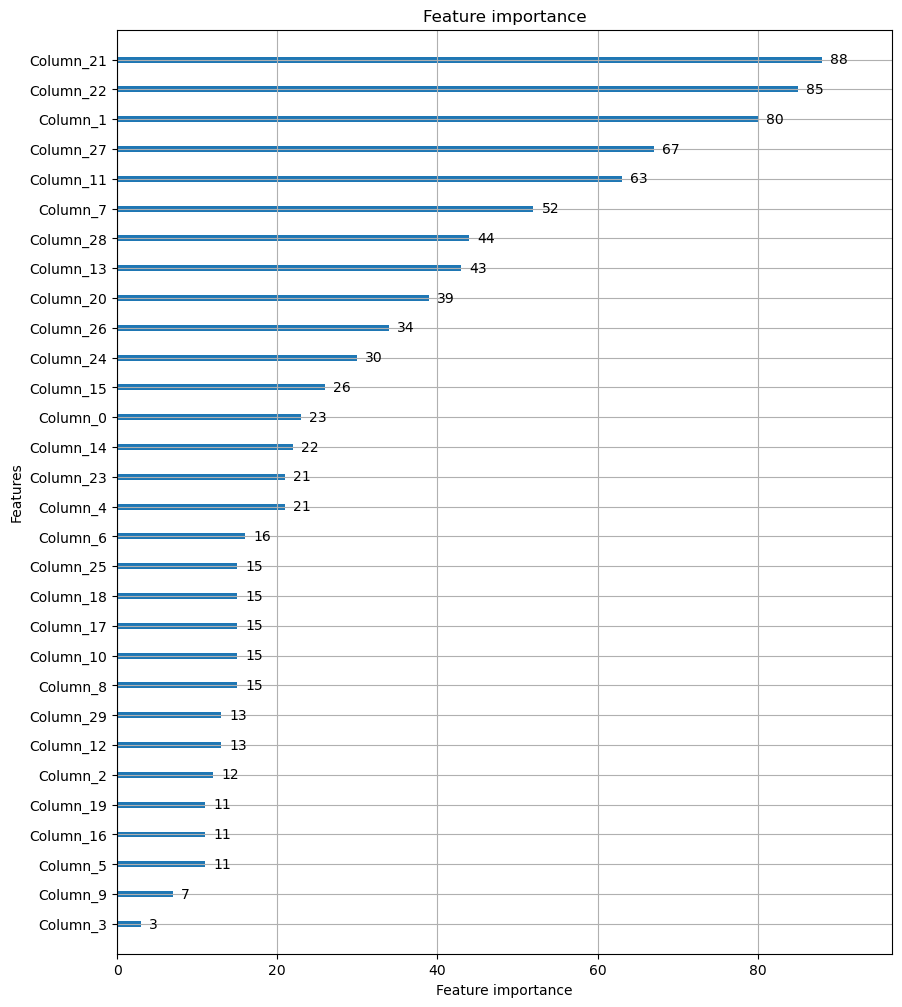

In [6]:
#plot_importance()를 이용해 피처 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)

## [08] 분류 실습 - 캐글 산탄데르 고객 만족 예측

: 캐글의 산탄데로 고객 만족 데이터 세트에 대해서 고객 만족 여부를 XGBoost와 LightGBM을 활용해 예측.
 - 370개의 피처로 주어진 데이터 세트 기반에서 고객 만족 여부를 예측하는 것. 
 - 피처이름이 익명처리되어 어떤 속성인지 알 수 는 없음. TARGET값이 1이면 불만을 가진 고객, 0이면 만족한 고객.
 - 모델의 성능 평가는 ROC-AUC로 평가. 대부분이 만족이고 불만족인 데이터는 일부일 것이기 때문.

**[데이터 전처리]**
: XGBoost는 사이킷런 래퍼를 이용할 것.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("./train_santander.csv",encoding='latin-1')
print('dataset shape:',cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [8]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


 - 전체 데이터에서 만족과 불만족의 비율을 살펴봄. 레이블인 Target 속성의 값의 분포를 알아보자.

In [10]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 3008.00


In [11]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


 - ID 피처는 단순 식별자에 불과하므로 피처를 드롭
 - 클래스 데이터 세트와 피처 데이터 세트를 분리해 별도의 데이터 세트로 별도로 저장.

In [12]:
cust_df['var3'].replace(-999999,2,inplace=True)
cust_df.drop('ID',axis=1,inplace=True)

#피처 세트와 레이블 세트 분리, 레이블 칼럼은 DataFrame의 맨 마지막에 위치해 칼럼 위치 -1로 분리.
X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


 - 학습과 성능 평가를 위해서 원본 데이터 세트에서 학습 데이터 세트와 테스트 데이터 세트를 분리.
 - 비대칭한 데이터 세트이므로 클래스인 Target값 분포도가 학습 데이터와 테스트 데이터 세트에 모두 비슷하게 추출됐는지 확인.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X_features, y_labels,
                                                  test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 shape:{0}, 테스트 세트 shape:{1}'.format(X_train.shape,X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 shape:(60816, 369), 테스트 세트 shape:(15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


**[XGBoost모델 학습과 하이퍼 파라미터 튜닝]**

 : XGBoost의 학습 모델을 생성하고 예측 결과를 ROC AUC로 평가.
  - 사이킷런 래퍼인 XGBClassifier를 기반으로 학습을 수행.
  
      : n_estimators는 500으로 하되 early_stopping_rounds를 100으로.

In [16]:
from xgboost import XGBClassifier 
from sklearn.metrics import roc_auc_score

#n_estimators는 500으로, random_state는 예제 수행 시마다 동일 예측 결과를 위해 설정.
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

#성능 평가 지표를 auc로 조기 중단 파라미터는 100으로 설정하고 학습 수행.
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
           eval_metric="auc", eval_set = [(X_train,y_train),(X_test,y_test)])
xgb_roc_score = roc_auc_score(y_test,xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82745
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85831	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84055
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88071	validation_1-auc:0.84117
[16]	validation_0-auc:0.88237	validation_1-auc:0.84101
[17]	validation_0-auc:0.88352	validation_1-auc:0.84071
[18]	validation_0-au

 - XGBoost의 하이퍼 파라미터 튜닝을 수행.
 
     :학습시간이 많이 필요한 Ml모델인 경우 하이퍼 파라미터 튜닝을 수행할때 먼저 2,3개 정도의 파라미터를 결합해 최적의 파라미터를 찾아낸 뒤에 다시 다른 파라미터를 결합하는 식으로..

In [17]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgf_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5,0.75]}

#cv=3으로 지정
gridcv = GridSearchCV(xgb_clf, param_grid = params, cv=3)
gridcv.fit(X_train,y_train,early_stopping_rounds=30, eval_metric="auc",
          eval_set=[(X_train,y_train),(X_test,y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test,gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.70629	validation_1-auc:0.71552
[1]	validation_0-auc:0.79529	validation_1-auc:0.80747
[2]	validation_0-auc:0.79939	validation_1-auc:0.80662
[3]	validation_0-auc:0.80449	validation_1-auc:0.80694
[4]	validation_0-auc:0.80267	validation_1-auc:0.80336
[5]	validation_0-auc:0.82025	validation_1-auc:0.81848
[6]	validation_0-auc:0.82861	validation_1-auc:0.82517
[7]	validation_0-auc:0.84012	validation_1-auc:0.83344
[8]	validation_0-auc:0.84475	validation_1-auc:0.83705
[9]	validation_0-auc:0.84382	validation_1-auc:0.83378
[10]	validation_0-auc:0.84814	validation_1-auc:0.83654
[11]	validation_0-auc:0.84906	validation_1-auc:0.83434
[12]	validation_0-auc:0.85282	validation_1-auc:0.83742
[13]	validation_0-auc:0.85296	validation_1-auc:0.83479
[14]	validation_0-auc:0.85563	validation_1-auc:0.83806
[15]	validation_0-auc:0.85613	validation_1-auc:0.83747
[16]	validation_0-auc:0.85905	validation_1-auc:0.83818
[17]	validation_0-auc:0.86027	validation_1-auc:0.83860
[18]	validation_0-au

C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.70750	validation_1-auc:0.71420
[1]	validation_0-auc:0.80323	validation_1-auc:0.81315
[2]	validation_0-auc:0.80534	validation_1-auc:0.81051
[3]	validation_0-auc:0.81099	validation_1-auc:0.81285
[4]	validation_0-auc:0.81022	validation_1-auc:0.81009
[5]	validation_0-auc:0.82630	validation_1-auc:0.82146
[6]	validation_0-auc:0.83523	validation_1-auc:0.82763
[7]	validation_0-auc:0.84184	validation_1-auc:0.83287
[8]	validation_0-auc:0.84718	validation_1-auc:0.83823
[9]	validation_0-auc:0.84576	validation_1-auc:0.83698
[10]	validation_0-auc:0.84846	validation_1-auc:0.83726
[11]	validation_0-auc:0.84848	validation_1-auc:0.83758
[12]	validation_0-auc:0.85276	validation_1-auc:0.84118
[13]	validation_0-auc:0.85373	validation_1-auc:0.83998
[14]	validation_0-auc:0.85628	validation_1-auc:0.84255
[15]	validation_0-auc:0.85699	validation_1-auc:0.84239
[16]	validation_0-auc:0.85937	validation_1-auc:0.84308
[17]	validation_0-auc:0.85986	validation_1-auc:0.84363
[18]	validation_0-au

C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.71076	validation_1-auc:0.71428
[1]	validation_0-auc:0.81266	validation_1-auc:0.81132
[2]	validation_0-auc:0.80436	validation_1-auc:0.80141
[3]	validation_0-auc:0.80951	validation_1-auc:0.80632
[4]	validation_0-auc:0.81082	validation_1-auc:0.80941
[5]	validation_0-auc:0.82997	validation_1-auc:0.82623
[6]	validation_0-auc:0.83679	validation_1-auc:0.83132
[7]	validation_0-auc:0.84283	validation_1-auc:0.83398
[8]	validation_0-auc:0.84591	validation_1-auc:0.83728
[9]	validation_0-auc:0.84403	validation_1-auc:0.83455
[10]	validation_0-auc:0.85034	validation_1-auc:0.83717
[11]	validation_0-auc:0.85158	validation_1-auc:0.83715
[12]	validation_0-auc:0.85568	validation_1-auc:0.83829
[13]	validation_0-auc:0.85696	validation_1-auc:0.83761
[14]	validation_0-auc:0.85862	validation_1-auc:0.83932
[15]	validation_0-auc:0.85857	validation_1-auc:0.83870
[16]	validation_0-auc:0.86088	validation_1-auc:0.84068
[17]	validation_0-auc:0.86190	validation_1-auc:0.84122
[18]	validation_0-au

C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.70730	validation_1-auc:0.71971
[1]	validation_0-auc:0.81282	validation_1-auc:0.82050
[2]	validation_0-auc:0.80737	validation_1-auc:0.81380
[3]	validation_0-auc:0.80999	validation_1-auc:0.81404
[4]	validation_0-auc:0.80732	validation_1-auc:0.80976
[5]	validation_0-auc:0.82348	validation_1-auc:0.82367
[6]	validation_0-auc:0.83316	validation_1-auc:0.82986
[7]	validation_0-auc:0.83968	validation_1-auc:0.83484
[8]	validation_0-auc:0.84392	validation_1-auc:0.83817
[9]	validation_0-auc:0.84441	validation_1-auc:0.83352
[10]	validation_0-auc:0.84829	validation_1-auc:0.83487
[11]	validation_0-auc:0.84967	validation_1-auc:0.83502
[12]	validation_0-auc:0.85287	validation_1-auc:0.83855
[13]	validation_0-auc:0.85227	validation_1-auc:0.83670
[14]	validation_0-auc:0.85519	validation_1-auc:0.83828
[15]	validation_0-auc:0.85502	validation_1-auc:0.83754
[16]	validation_0-auc:0.85738	validation_1-auc:0.83830
[17]	validation_0-auc:0.85797	validation_1-auc:0.83819
[18]	validation_0-au

C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.70584	validation_1-auc:0.71432
[1]	validation_0-auc:0.80755	validation_1-auc:0.81795
[2]	validation_0-auc:0.80686	validation_1-auc:0.80989
[3]	validation_0-auc:0.81348	validation_1-auc:0.81365
[4]	validation_0-auc:0.81359	validation_1-auc:0.81204
[5]	validation_0-auc:0.83022	validation_1-auc:0.82429
[6]	validation_0-auc:0.83827	validation_1-auc:0.82975
[7]	validation_0-auc:0.84381	validation_1-auc:0.83299
[8]	validation_0-auc:0.84777	validation_1-auc:0.83766
[9]	validation_0-auc:0.84635	validation_1-auc:0.83563
[10]	validation_0-auc:0.84937	validation_1-auc:0.83758
[11]	validation_0-auc:0.84813	validation_1-auc:0.83707
[12]	validation_0-auc:0.85253	validation_1-auc:0.84064
[13]	validation_0-auc:0.85233	validation_1-auc:0.83968
[14]	validation_0-auc:0.85535	validation_1-auc:0.84142
[15]	validation_0-auc:0.85640	validation_1-auc:0.84100
[16]	validation_0-auc:0.85854	validation_1-auc:0.84159
[17]	validation_0-auc:0.85894	validation_1-auc:0.84126
[18]	validation_0-au

C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.73604	validation_1-auc:0.74386
[1]	validation_0-auc:0.81755	validation_1-auc:0.81723
[2]	validation_0-auc:0.80798	validation_1-auc:0.80428
[3]	validation_0-auc:0.81134	validation_1-auc:0.80854
[4]	validation_0-auc:0.80819	validation_1-auc:0.80680
[5]	validation_0-auc:0.82747	validation_1-auc:0.82209
[6]	validation_0-auc:0.83684	validation_1-auc:0.83159
[7]	validation_0-auc:0.84245	validation_1-auc:0.83445
[8]	validation_0-auc:0.84521	validation_1-auc:0.83777
[9]	validation_0-auc:0.84383	validation_1-auc:0.83453
[10]	validation_0-auc:0.84980	validation_1-auc:0.83700
[11]	validation_0-auc:0.85053	validation_1-auc:0.83812
[12]	validation_0-auc:0.85451	validation_1-auc:0.83921
[13]	validation_0-auc:0.85528	validation_1-auc:0.83894
[14]	validation_0-auc:0.85685	validation_1-auc:0.83952
[15]	validation_0-auc:0.85734	validation_1-auc:0.83893
[16]	validation_0-auc:0.85861	validation_1-auc:0.84017
[17]	validation_0-auc:0.85937	validation_1-auc:0.84083
[18]	validation_0-au

C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.70988	validation_1-auc:0.72112
[1]	validation_0-auc:0.81635	validation_1-auc:0.81921
[2]	validation_0-auc:0.81263	validation_1-auc:0.81273
[3]	validation_0-auc:0.81736	validation_1-auc:0.80952
[4]	validation_0-auc:0.81539	validation_1-auc:0.80736
[5]	validation_0-auc:0.83280	validation_1-auc:0.81901
[6]	validation_0-auc:0.84582	validation_1-auc:0.82711
[7]	validation_0-auc:0.85297	validation_1-auc:0.83219
[8]	validation_0-auc:0.85832	validation_1-auc:0.83541
[9]	validation_0-auc:0.85882	validation_1-auc:0.83191
[10]	validation_0-auc:0.86339	validation_1-auc:0.83334
[11]	validation_0-auc:0.86325	validation_1-auc:0.83105
[12]	validation_0-auc:0.86805	validation_1-auc:0.83303
[13]	validation_0-auc:0.86816	validation_1-auc:0.83069
[14]	validation_0-auc:0.87290	validation_1-auc:0.83445
[15]	validation_0-auc:0.87375	validation_1-auc:0.83203
[16]	validation_0-auc:0.87604	validation_1-auc:0.83167
[17]	validation_0-auc:0.87708	validation_1-auc:0.82994
[18]	validation_0-au

C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.70944	validation_1-auc:0.71405
[1]	validation_0-auc:0.81156	validation_1-auc:0.81651
[2]	validation_0-auc:0.81622	validation_1-auc:0.81393
[3]	validation_0-auc:0.82146	validation_1-auc:0.81538
[4]	validation_0-auc:0.82256	validation_1-auc:0.81460
[5]	validation_0-auc:0.84162	validation_1-auc:0.82804
[6]	validation_0-auc:0.84979	validation_1-auc:0.83421
[7]	validation_0-auc:0.85560	validation_1-auc:0.83643
[8]	validation_0-auc:0.86150	validation_1-auc:0.83905
[9]	validation_0-auc:0.86120	validation_1-auc:0.83678
[10]	validation_0-auc:0.86766	validation_1-auc:0.83849
[11]	validation_0-auc:0.86672	validation_1-auc:0.83748
[12]	validation_0-auc:0.87201	validation_1-auc:0.84144
[13]	validation_0-auc:0.87267	validation_1-auc:0.84183
[14]	validation_0-auc:0.87598	validation_1-auc:0.84328
[15]	validation_0-auc:0.87734	validation_1-auc:0.84108
[16]	validation_0-auc:0.87993	validation_1-auc:0.84226
[17]	validation_0-auc:0.88053	validation_1-auc:0.84232
[18]	validation_0-au

C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.71643	validation_1-auc:0.71937
[1]	validation_0-auc:0.81725	validation_1-auc:0.81257
[2]	validation_0-auc:0.81647	validation_1-auc:0.80591
[3]	validation_0-auc:0.82137	validation_1-auc:0.80955
[4]	validation_0-auc:0.82080	validation_1-auc:0.80793
[5]	validation_0-auc:0.84049	validation_1-auc:0.82226
[6]	validation_0-auc:0.84887	validation_1-auc:0.83007
[7]	validation_0-auc:0.85453	validation_1-auc:0.83407
[8]	validation_0-auc:0.85947	validation_1-auc:0.83559
[9]	validation_0-auc:0.85898	validation_1-auc:0.83336
[10]	validation_0-auc:0.86521	validation_1-auc:0.83375
[11]	validation_0-auc:0.86658	validation_1-auc:0.83222
[12]	validation_0-auc:0.87242	validation_1-auc:0.83350
[13]	validation_0-auc:0.87318	validation_1-auc:0.83130
[14]	validation_0-auc:0.87605	validation_1-auc:0.83298
[15]	validation_0-auc:0.87614	validation_1-auc:0.83317
[16]	validation_0-auc:0.87802	validation_1-auc:0.83582
[17]	validation_0-auc:0.87871	validation_1-auc:0.83612
[18]	validation_0-au

C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.71065	validation_1-auc:0.72162
[1]	validation_0-auc:0.81004	validation_1-auc:0.81744
[2]	validation_0-auc:0.81166	validation_1-auc:0.81353
[3]	validation_0-auc:0.81782	validation_1-auc:0.81079
[4]	validation_0-auc:0.81689	validation_1-auc:0.80562
[5]	validation_0-auc:0.83479	validation_1-auc:0.82049
[6]	validation_0-auc:0.84517	validation_1-auc:0.82760
[7]	validation_0-auc:0.85094	validation_1-auc:0.83378
[8]	validation_0-auc:0.85687	validation_1-auc:0.83678
[9]	validation_0-auc:0.85629	validation_1-auc:0.83338
[10]	validation_0-auc:0.86106	validation_1-auc:0.83592
[11]	validation_0-auc:0.86092	validation_1-auc:0.83293
[12]	validation_0-auc:0.86557	validation_1-auc:0.83586
[13]	validation_0-auc:0.86594	validation_1-auc:0.83273
[14]	validation_0-auc:0.86910	validation_1-auc:0.83553
[15]	validation_0-auc:0.86984	validation_1-auc:0.83451
[16]	validation_0-auc:0.87178	validation_1-auc:0.83443
[17]	validation_0-auc:0.87223	validation_1-auc:0.83423
[18]	validation_0-au

C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.70846	validation_1-auc:0.71494
[1]	validation_0-auc:0.81070	validation_1-auc:0.81777
[2]	validation_0-auc:0.81721	validation_1-auc:0.81392
[3]	validation_0-auc:0.82310	validation_1-auc:0.81414
[4]	validation_0-auc:0.82093	validation_1-auc:0.81017
[5]	validation_0-auc:0.84004	validation_1-auc:0.82423
[6]	validation_0-auc:0.84819	validation_1-auc:0.83208
[7]	validation_0-auc:0.85359	validation_1-auc:0.83601
[8]	validation_0-auc:0.85782	validation_1-auc:0.83921
[9]	validation_0-auc:0.85787	validation_1-auc:0.83822
[10]	validation_0-auc:0.86167	validation_1-auc:0.84078
[11]	validation_0-auc:0.86090	validation_1-auc:0.83745
[12]	validation_0-auc:0.86677	validation_1-auc:0.84246
[13]	validation_0-auc:0.86665	validation_1-auc:0.84086
[14]	validation_0-auc:0.86914	validation_1-auc:0.84296
[15]	validation_0-auc:0.87060	validation_1-auc:0.84181
[16]	validation_0-auc:0.87293	validation_1-auc:0.84138
[17]	validation_0-auc:0.87416	validation_1-auc:0.84119
[18]	validation_0-au

C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.74305	validation_1-auc:0.74372
[1]	validation_0-auc:0.82179	validation_1-auc:0.81731
[2]	validation_0-auc:0.81769	validation_1-auc:0.80676
[3]	validation_0-auc:0.82112	validation_1-auc:0.81124
[4]	validation_0-auc:0.82039	validation_1-auc:0.80906
[5]	validation_0-auc:0.84071	validation_1-auc:0.82533
[6]	validation_0-auc:0.84924	validation_1-auc:0.83369
[7]	validation_0-auc:0.85494	validation_1-auc:0.83594
[8]	validation_0-auc:0.85892	validation_1-auc:0.83699
[9]	validation_0-auc:0.85757	validation_1-auc:0.83509
[10]	validation_0-auc:0.86274	validation_1-auc:0.83787
[11]	validation_0-auc:0.86276	validation_1-auc:0.83597
[12]	validation_0-auc:0.86875	validation_1-auc:0.83667
[13]	validation_0-auc:0.86937	validation_1-auc:0.83627
[14]	validation_0-auc:0.87193	validation_1-auc:0.83924
[15]	validation_0-auc:0.87264	validation_1-auc:0.83817
[16]	validation_0-auc:0.87425	validation_1-auc:0.83972
[17]	validation_0-auc:0.87470	validation_1-auc:0.83992
[18]	validation_0-au

C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.70662	validation_1-auc:0.71616
[1]	validation_0-auc:0.81153	validation_1-auc:0.81559
[2]	validation_0-auc:0.80587	validation_1-auc:0.80991
[3]	validation_0-auc:0.80616	validation_1-auc:0.80560
[4]	validation_0-auc:0.82230	validation_1-auc:0.81970
[5]	validation_0-auc:0.83247	validation_1-auc:0.82858
[6]	validation_0-auc:0.84039	validation_1-auc:0.83377
[7]	validation_0-auc:0.84494	validation_1-auc:0.83628
[8]	validation_0-auc:0.84656	validation_1-auc:0.83730
[9]	validation_0-auc:0.84738	validation_1-auc:0.83494
[10]	validation_0-auc:0.85046	validation_1-auc:0.83759
[11]	validation_0-auc:0.85138	validation_1-auc:0.83460
[12]	validation_0-auc:0.85531	validation_1-auc:0.83712
[13]	validation_0-auc:0.85683	validation_1-auc:0.83441
[14]	validation_0-auc:0.85931	validation_1-auc:0.83523
[15]	validation_0-auc:0.86068	validation_1-auc:0.83563
[16]	validation_0-auc:0.86192	validation_1-auc:0.83572
[17]	validation_0-auc:0.86342	validation_1-auc:0.83627
[18]	validation_0-au

C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.70803	validation_1-auc:0.71523
[1]	validation_0-auc:0.81350	validation_1-auc:0.81729
[2]	validation_0-auc:0.80927	validation_1-auc:0.81169
[3]	validation_0-auc:0.81081	validation_1-auc:0.81124
[4]	validation_0-auc:0.82945	validation_1-auc:0.82689
[5]	validation_0-auc:0.83741	validation_1-auc:0.83190
[6]	validation_0-auc:0.84360	validation_1-auc:0.83725
[7]	validation_0-auc:0.84714	validation_1-auc:0.83857
[8]	validation_0-auc:0.84956	validation_1-auc:0.83915
[9]	validation_0-auc:0.84994	validation_1-auc:0.83943
[10]	validation_0-auc:0.85161	validation_1-auc:0.84090
[11]	validation_0-auc:0.85255	validation_1-auc:0.83798
[12]	validation_0-auc:0.85752	validation_1-auc:0.83944
[13]	validation_0-auc:0.85885	validation_1-auc:0.83749
[14]	validation_0-auc:0.86077	validation_1-auc:0.83961
[15]	validation_0-auc:0.86201	validation_1-auc:0.84007
[16]	validation_0-auc:0.86275	validation_1-auc:0.84029
[17]	validation_0-auc:0.86380	validation_1-auc:0.84028
[18]	validation_0-au

C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.70756	validation_1-auc:0.71367
[1]	validation_0-auc:0.81539	validation_1-auc:0.82037
[2]	validation_0-auc:0.81185	validation_1-auc:0.81225
[3]	validation_0-auc:0.80718	validation_1-auc:0.80582
[4]	validation_0-auc:0.82636	validation_1-auc:0.82143
[5]	validation_0-auc:0.83810	validation_1-auc:0.82896
[6]	validation_0-auc:0.84307	validation_1-auc:0.83595
[7]	validation_0-auc:0.84603	validation_1-auc:0.83657
[8]	validation_0-auc:0.84844	validation_1-auc:0.83852
[9]	validation_0-auc:0.84833	validation_1-auc:0.83912
[10]	validation_0-auc:0.85336	validation_1-auc:0.84050
[11]	validation_0-auc:0.85423	validation_1-auc:0.84046
[12]	validation_0-auc:0.85692	validation_1-auc:0.84050
[13]	validation_0-auc:0.85828	validation_1-auc:0.84065
[14]	validation_0-auc:0.86023	validation_1-auc:0.84136
[15]	validation_0-auc:0.86194	validation_1-auc:0.84197
[16]	validation_0-auc:0.86308	validation_1-auc:0.84268
[17]	validation_0-auc:0.86385	validation_1-auc:0.84281
[18]	validation_0-au

C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.70720	validation_1-auc:0.71986
[1]	validation_0-auc:0.81541	validation_1-auc:0.82101
[2]	validation_0-auc:0.80745	validation_1-auc:0.81198
[3]	validation_0-auc:0.80812	validation_1-auc:0.81049
[4]	validation_0-auc:0.82289	validation_1-auc:0.82262
[5]	validation_0-auc:0.83308	validation_1-auc:0.83125
[6]	validation_0-auc:0.83965	validation_1-auc:0.83389
[7]	validation_0-auc:0.84310	validation_1-auc:0.83592
[8]	validation_0-auc:0.84495	validation_1-auc:0.83676
[9]	validation_0-auc:0.84669	validation_1-auc:0.83653
[10]	validation_0-auc:0.85050	validation_1-auc:0.83647
[11]	validation_0-auc:0.85214	validation_1-auc:0.83396
[12]	validation_0-auc:0.85472	validation_1-auc:0.83619
[13]	validation_0-auc:0.85511	validation_1-auc:0.83607
[14]	validation_0-auc:0.85780	validation_1-auc:0.83689
[15]	validation_0-auc:0.85839	validation_1-auc:0.83762
[16]	validation_0-auc:0.85946	validation_1-auc:0.83859
[17]	validation_0-auc:0.86029	validation_1-auc:0.83898
[18]	validation_0-au

C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.71530	validation_1-auc:0.72310
[1]	validation_0-auc:0.81691	validation_1-auc:0.82146
[2]	validation_0-auc:0.81177	validation_1-auc:0.81507
[3]	validation_0-auc:0.81260	validation_1-auc:0.81317
[4]	validation_0-auc:0.82937	validation_1-auc:0.82683
[5]	validation_0-auc:0.83682	validation_1-auc:0.83015
[6]	validation_0-auc:0.84287	validation_1-auc:0.83500
[7]	validation_0-auc:0.84609	validation_1-auc:0.83687
[8]	validation_0-auc:0.84791	validation_1-auc:0.83899
[9]	validation_0-auc:0.84792	validation_1-auc:0.83827
[10]	validation_0-auc:0.85048	validation_1-auc:0.84088
[11]	validation_0-auc:0.85135	validation_1-auc:0.83860
[12]	validation_0-auc:0.85553	validation_1-auc:0.83970
[13]	validation_0-auc:0.85588	validation_1-auc:0.83943
[14]	validation_0-auc:0.85829	validation_1-auc:0.83977
[15]	validation_0-auc:0.85974	validation_1-auc:0.83990
[16]	validation_0-auc:0.86040	validation_1-auc:0.84010
[17]	validation_0-auc:0.86127	validation_1-auc:0.84090
[18]	validation_0-au

C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.73430	validation_1-auc:0.74015
[1]	validation_0-auc:0.82077	validation_1-auc:0.82221
[2]	validation_0-auc:0.80708	validation_1-auc:0.80601
[3]	validation_0-auc:0.80738	validation_1-auc:0.80451
[4]	validation_0-auc:0.82706	validation_1-auc:0.82065
[5]	validation_0-auc:0.83512	validation_1-auc:0.82654
[6]	validation_0-auc:0.84027	validation_1-auc:0.83431
[7]	validation_0-auc:0.84462	validation_1-auc:0.83640
[8]	validation_0-auc:0.84705	validation_1-auc:0.83972
[9]	validation_0-auc:0.84731	validation_1-auc:0.84026
[10]	validation_0-auc:0.85215	validation_1-auc:0.84103
[11]	validation_0-auc:0.85238	validation_1-auc:0.83843
[12]	validation_0-auc:0.85500	validation_1-auc:0.83896
[13]	validation_0-auc:0.85645	validation_1-auc:0.83746
[14]	validation_0-auc:0.85807	validation_1-auc:0.83929
[15]	validation_0-auc:0.85994	validation_1-auc:0.84056
[16]	validation_0-auc:0.86149	validation_1-auc:0.84066
[17]	validation_0-auc:0.86200	validation_1-auc:0.84033
[18]	validation_0-au

C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.71047	validation_1-auc:0.72221
[1]	validation_0-auc:0.81439	validation_1-auc:0.81638
[2]	validation_0-auc:0.81398	validation_1-auc:0.81326
[3]	validation_0-auc:0.81613	validation_1-auc:0.80956
[4]	validation_0-auc:0.83523	validation_1-auc:0.82248
[5]	validation_0-auc:0.84579	validation_1-auc:0.83133
[6]	validation_0-auc:0.85343	validation_1-auc:0.83578
[7]	validation_0-auc:0.85681	validation_1-auc:0.83743
[8]	validation_0-auc:0.86130	validation_1-auc:0.83916
[9]	validation_0-auc:0.86332	validation_1-auc:0.83601
[10]	validation_0-auc:0.86731	validation_1-auc:0.83577
[11]	validation_0-auc:0.86994	validation_1-auc:0.83370
[12]	validation_0-auc:0.87352	validation_1-auc:0.83370
[13]	validation_0-auc:0.87406	validation_1-auc:0.83321
[14]	validation_0-auc:0.87678	validation_1-auc:0.83402
[15]	validation_0-auc:0.87806	validation_1-auc:0.83455
[16]	validation_0-auc:0.87903	validation_1-auc:0.83401
[17]	validation_0-auc:0.88024	validation_1-auc:0.83342
[18]	validation_0-au

C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.71848	validation_1-auc:0.72285
[1]	validation_0-auc:0.82164	validation_1-auc:0.82158
[2]	validation_0-auc:0.81797	validation_1-auc:0.81498
[3]	validation_0-auc:0.82280	validation_1-auc:0.81345
[4]	validation_0-auc:0.84258	validation_1-auc:0.82822
[5]	validation_0-auc:0.85058	validation_1-auc:0.83418
[6]	validation_0-auc:0.85679	validation_1-auc:0.83776
[7]	validation_0-auc:0.86112	validation_1-auc:0.84137
[8]	validation_0-auc:0.86407	validation_1-auc:0.84227
[9]	validation_0-auc:0.86564	validation_1-auc:0.84123
[10]	validation_0-auc:0.86886	validation_1-auc:0.84127
[11]	validation_0-auc:0.87027	validation_1-auc:0.83960
[12]	validation_0-auc:0.87440	validation_1-auc:0.83935
[13]	validation_0-auc:0.87568	validation_1-auc:0.83794
[14]	validation_0-auc:0.87923	validation_1-auc:0.83829
[15]	validation_0-auc:0.88139	validation_1-auc:0.83869
[16]	validation_0-auc:0.88289	validation_1-auc:0.83827
[17]	validation_0-auc:0.88369	validation_1-auc:0.83849
[18]	validation_0-au

C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.71470	validation_1-auc:0.71780
[1]	validation_0-auc:0.81916	validation_1-auc:0.82137
[2]	validation_0-auc:0.81804	validation_1-auc:0.81289
[3]	validation_0-auc:0.81871	validation_1-auc:0.80486
[4]	validation_0-auc:0.83948	validation_1-auc:0.82299
[5]	validation_0-auc:0.84834	validation_1-auc:0.82983
[6]	validation_0-auc:0.85434	validation_1-auc:0.83560
[7]	validation_0-auc:0.85989	validation_1-auc:0.83675
[8]	validation_0-auc:0.86473	validation_1-auc:0.83802
[9]	validation_0-auc:0.86582	validation_1-auc:0.83773
[10]	validation_0-auc:0.87083	validation_1-auc:0.83813
[11]	validation_0-auc:0.87221	validation_1-auc:0.83914
[12]	validation_0-auc:0.87637	validation_1-auc:0.83840
[13]	validation_0-auc:0.87734	validation_1-auc:0.83804
[14]	validation_0-auc:0.88019	validation_1-auc:0.83868
[15]	validation_0-auc:0.88171	validation_1-auc:0.84042
[16]	validation_0-auc:0.88261	validation_1-auc:0.84000
[17]	validation_0-auc:0.88426	validation_1-auc:0.83970
[18]	validation_0-au

C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.71049	validation_1-auc:0.72196
[1]	validation_0-auc:0.81327	validation_1-auc:0.82008
[2]	validation_0-auc:0.81336	validation_1-auc:0.81399
[3]	validation_0-auc:0.81878	validation_1-auc:0.81036
[4]	validation_0-auc:0.83586	validation_1-auc:0.82293
[5]	validation_0-auc:0.84628	validation_1-auc:0.83130
[6]	validation_0-auc:0.85384	validation_1-auc:0.83488
[7]	validation_0-auc:0.85611	validation_1-auc:0.83615
[8]	validation_0-auc:0.85953	validation_1-auc:0.83628
[9]	validation_0-auc:0.86107	validation_1-auc:0.83506
[10]	validation_0-auc:0.86473	validation_1-auc:0.83596
[11]	validation_0-auc:0.86505	validation_1-auc:0.83404
[12]	validation_0-auc:0.86859	validation_1-auc:0.83710
[13]	validation_0-auc:0.86900	validation_1-auc:0.83285
[14]	validation_0-auc:0.87275	validation_1-auc:0.83406
[15]	validation_0-auc:0.87411	validation_1-auc:0.83398
[16]	validation_0-auc:0.87470	validation_1-auc:0.83462
[17]	validation_0-auc:0.87608	validation_1-auc:0.83316
[18]	validation_0-au

C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.71885	validation_1-auc:0.72325
[1]	validation_0-auc:0.82144	validation_1-auc:0.82218
[2]	validation_0-auc:0.82319	validation_1-auc:0.81957
[3]	validation_0-auc:0.82133	validation_1-auc:0.81400
[4]	validation_0-auc:0.84136	validation_1-auc:0.82861
[5]	validation_0-auc:0.85046	validation_1-auc:0.83291
[6]	validation_0-auc:0.85618	validation_1-auc:0.83641
[7]	validation_0-auc:0.85964	validation_1-auc:0.83759
[8]	validation_0-auc:0.86167	validation_1-auc:0.83906
[9]	validation_0-auc:0.86282	validation_1-auc:0.83704
[10]	validation_0-auc:0.86537	validation_1-auc:0.83746
[11]	validation_0-auc:0.86678	validation_1-auc:0.83595
[12]	validation_0-auc:0.87021	validation_1-auc:0.83697
[13]	validation_0-auc:0.87148	validation_1-auc:0.83529
[14]	validation_0-auc:0.87368	validation_1-auc:0.83571
[15]	validation_0-auc:0.87516	validation_1-auc:0.83613
[16]	validation_0-auc:0.87639	validation_1-auc:0.83632
[17]	validation_0-auc:0.87775	validation_1-auc:0.83674
[18]	validation_0-au

C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.73885	validation_1-auc:0.73929
[1]	validation_0-auc:0.81998	validation_1-auc:0.81222
[2]	validation_0-auc:0.82153	validation_1-auc:0.81126
[3]	validation_0-auc:0.82306	validation_1-auc:0.80992
[4]	validation_0-auc:0.83825	validation_1-auc:0.82016
[5]	validation_0-auc:0.84999	validation_1-auc:0.83019
[6]	validation_0-auc:0.85529	validation_1-auc:0.83502
[7]	validation_0-auc:0.86025	validation_1-auc:0.83453
[8]	validation_0-auc:0.86258	validation_1-auc:0.83642
[9]	validation_0-auc:0.86331	validation_1-auc:0.83597
[10]	validation_0-auc:0.86682	validation_1-auc:0.83763
[11]	validation_0-auc:0.86834	validation_1-auc:0.83694
[12]	validation_0-auc:0.87284	validation_1-auc:0.83687
[13]	validation_0-auc:0.87318	validation_1-auc:0.83737
[14]	validation_0-auc:0.87504	validation_1-auc:0.83870
[15]	validation_0-auc:0.87636	validation_1-auc:0.83871
[16]	validation_0-auc:0.87677	validation_1-auc:0.83988
[17]	validation_0-auc:0.87812	validation_1-auc:0.83915
[18]	validation_0-au

C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\june0\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.72743	validation_1-auc:0.73391
[1]	validation_0-auc:0.81610	validation_1-auc:0.81933
[2]	validation_0-auc:0.81357	validation_1-auc:0.81305
[3]	validation_0-auc:0.81604	validation_1-auc:0.81038
[4]	validation_0-auc:0.81552	validation_1-auc:0.80726
[5]	validation_0-auc:0.83270	validation_1-auc:0.82306
[6]	validation_0-auc:0.83929	validation_1-auc:0.83059
[7]	validation_0-auc:0.84477	validation_1-auc:0.83422
[8]	validation_0-auc:0.84905	validation_1-auc:0.83685
[9]	validation_0-auc:0.84744	validation_1-auc:0.83764
[10]	validation_0-auc:0.85271	validation_1-auc:0.83942
[11]	validation_0-auc:0.85233	validation_1-auc:0.83861
[12]	validation_0-auc:0.85704	validation_1-auc:0.84007
[13]	validation_0-auc:0.85678	validation_1-auc:0.84042
[14]	validation_0-auc:0.85994	validation_1-auc:0.84271
[15]	validation_0-auc:0.86101	validation_1-auc:0.84370
[16]	validation_0-auc:0.86264	validation_1-auc:0.84410
[17]	validation_0-auc:0.86332	validation_1-auc:0.84416
[18]	validation_0-au

-> ROC-AUC가 0.8443로 조금 개선됨.
- 앞에서 구한 최적화 하이퍼 파라미터를 기반으로 다른 하이퍼 파라미터를 변경 또는 추가해 다시 최적화를 진행.

In [19]:
#n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7,
                       min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

#성능 평가 지표를 auc로, 조기 중단 파라미터 값은 200으로 설정하고 학습 수행.
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200,
           eval_metric = "auc", eval_set=[(X_train,y_train),(X_test,y_test)])

xgb_roc_score = roc_auc_score(y_test,xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.73501	validation_1-auc:0.74128
[1]	validation_0-auc:0.82359	validation_1-auc:0.81776
[2]	validation_0-auc:0.81094	validation_1-auc:0.80194
[3]	validation_0-auc:0.81288	validation_1-auc:0.80637
[4]	validation_0-auc:0.82564	validation_1-auc:0.81831
[5]	validation_0-auc:0.83065	validation_1-auc:0.82196
[6]	validation_0-auc:0.83608	validation_1-auc:0.82734
[7]	validation_0-auc:0.83832	validation_1-auc:0.82902
[8]	validation_0-auc:0.84104	validation_1-auc:0.83114
[9]	validation_0-auc:0.84000	validation_1-auc:0.83020
[10]	validation_0-auc:0.84155	validation_1-auc:0.83071
[11]	validation_0-auc:0.84090	validation_1-auc:0.82996
[12]	validation_0-auc:0.84176	validation_1-auc:0.83039
[13]	validation_0-auc:0.83970	validation_1-auc:0.82909
[14]	validation_0-auc:0.84151	validation_1-auc:0.83008
[15]	validation_0-auc:0.84436	validation_1-auc:0.83231
[16]	validation_0-auc:0.84481	validation_1-auc:0.83256
[17]	validation_0-auc:0.84456	validation_1-auc:0.83193
[18]	validation_0-au

-> ROC_AUC가 약 0.8456으로 이전 테스트보다 살짝 향상된 결과를 나타내고 있음. 
 - 한가지 아쉬운 점은 XGBoost가 수행시간이 상당히 요구된다는 점.
 - 튜닝된 모델에서 각 피처의 중요도를 피처 중요도 그래프로 나타내봄. 

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

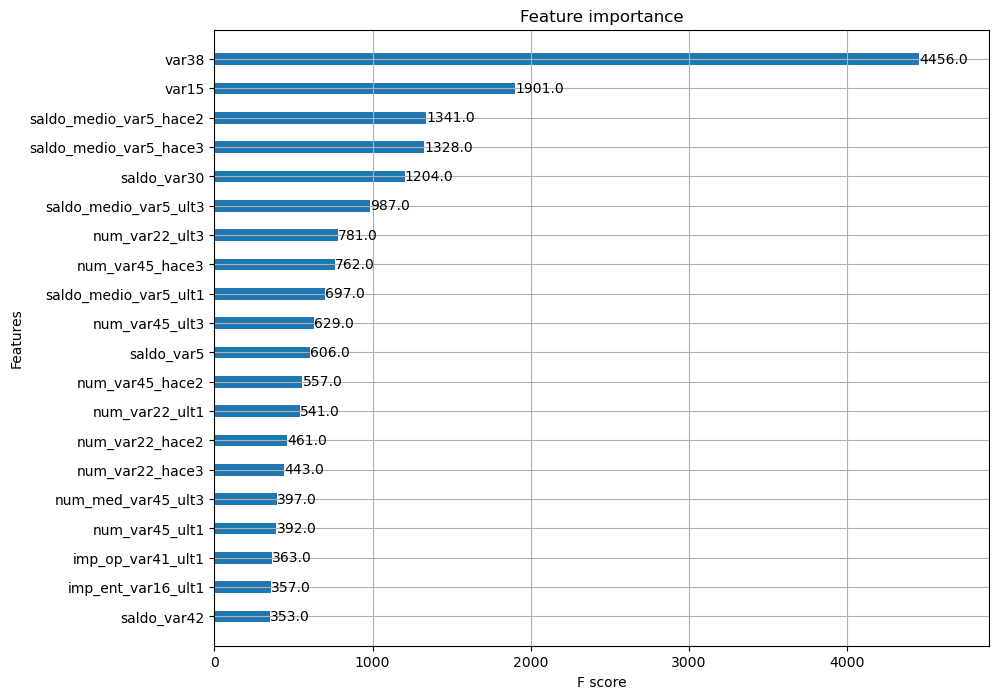

In [23]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf,ax=ax,max_num_features=20, height=0.4)

-> XGBoost의 예측 성능을 좌우하는 가장 중요한 피처는 var38,var15순.

**[LightGBM 모델 학습과 히이퍼 파라미터 튜닝]**

 : 앞예제에서 만들어진 데이터 세트를 기반으로 LightGBM으로 학습을 진행하고 ROC-AUC를 측정.
  - n_estimators는 500으로 설정하고, early_stopping_rounds는 100, 평가 데이터 세트는 테스트 데이터 세트, eval_metric은 auc로 설정

In [25]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test,y_test)]
lgbm_clf.fit(X_train, y_train,early_stopping_rounds=100, eval_metric="auc", 
             eval_set=evals,verbose=True)

lgbm_roc_score = roc_auc_score(y_test,lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

C:\Users\june0\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\june0\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.834093	valid_0's binary_logloss: 0.149427
[7]	valid_0's auc: 0.837046	valid_0's binary_logloss: 0.147961
[8]	valid_0's auc: 0.837838	valid_0's binary_logloss: 0.146591
[9]	valid_0's auc: 0.839435	valid_0's binary_logloss: 0.145455
[10]	valid_0's auc: 0.83973	valid_0's binary_logloss: 0.144486
[11]	valid_0's auc: 0.839799	valid_0's binary_logloss: 0.143769
[12]	valid_0's auc: 0.840034	valid_0's binary_logloss: 0.143146
[13]	valid_0's auc: 0.840271	valid_0's binary_logloss: 0.142533
[14]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.142036
[15]	valid_0's auc: 0.840928	valid_0's binary_logloss: 0.14161
[16]	valid_0's auc: 0.840337	valid_0's binary_loglo

 - GridSearchCV로 좀 더 다양한 하이퍼 파라미터에 대한 튜닝을 진행

In [27]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 200으로 감소
lgbm_clf = LGBMClassifier(n_estimators = 200)
params = {
    'num_leaves' : [32,64],
    'max_depth' : [128,160],
    'min_child_samples' : [60, 100],
    'subsample' : [0.8,1]}

# cv는 3으로 지정
gridcv = GridSearchCV(lgbm_clf, param_grid = params, cv = 3)
gridcv.fit(X_train, y_train, eval_metric = 'auc',
          eval_set = [(X_train, y_train), (X_test, y_test)])
print('gridsearchcv 최적 파라미터', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1] , average = 'macro')
print('ROC AUC :{0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832262	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826533	valid_1's binary_logloss: 0.156346
[4]	valid_0's auc: 0.83865	valid_0's binary_logloss: 0.144126	valid_1's auc: 0.833166	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.842822	valid_0's binary_logloss: 0.141725	valid_1's auc: 0.836448	valid_1's binary_logloss: 0.151167
[6]	valid_0's auc: 0.844702	valid_0's binary_logloss: 0.139642	valid_1's auc: 0.837094	valid_1's binary_logloss: 0.149356
[7]	valid_0's auc: 0.847144	valid_0's binary_logloss: 0.13794	valid_1's auc: 0.837965	valid_1's binary_logloss: 0.147853
[8]	valid_0's auc: 0.848277	valid_0's binary_logloss: 0.136499	valid_1's auc: 0.837663	valid_1's binary_logloss: 0.146543
[9]	valid_0's auc: 0.849328	v

 - 해당 하이퍼 파라미터를 LightGBM에 적용하고 다시 학습해 ROC-AUC 측정 결과를 도출.

In [28]:
lgbm_clf = LGBMClassifier(c_estimators=100,num_leaves=32, subsample=0.8, 
                          min_child_samples=100, max_depth=128)

evals = [(X_test,y_test)]
lgbm_clf.fit(X_train,y_train, early_stopping_rounds=100, eval_metric="auc",
             eval_set=evals,verbose=True)

lgbm_roc_score = roc_auc_score(y_test,lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}', format(lgbm_roc_score))

C:\Users\june0\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\june0\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: c_estimators
[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
[2]	valid_0's auc: 0.822075	valid_0's binary_logloss: 0.159734
[3]	valid_0's auc: 0.829436	valid_0's binary_logloss: 0.156119
[4]	valid_0's auc: 0.836147	valid_0's binary_logloss: 0.153073
[5]	valid_0's auc: 0.839041	valid_0's binary_logloss: 0.150773
[6]	valid_0's auc: 0.839076	valid_0's binary_logloss: 0.148948
[7]	valid_0's auc: 0.839943	valid_0's binary_logloss: 0.147346
[8]	valid_0's auc: 0.84098	valid_0's binary_logloss: 0.146068
[9]	valid_0's auc: 0.840686	valid_0's binary_logloss: 0.14506
[10]	valid_0's auc: 0.841299	valid_0's binary_logloss: 0.144134
[11]	valid_0's auc: 0.841659	valid_0's binary_logloss: 0.14327
[12]	valid_0's auc: 0.841543	valid_0's binary_logloss: 0.14261
[13]	valid_0's auc: 0.841645	valid_0's binary_logloss: 0.14205
[14]	valid_0's auc: 0.841389	valid_0's binary_logloss: 0.14164
[15]	valid_0's auc: 0.84154	valid_0's binary_logloss: 0.141254
[16